In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix #confusion matrix
from sklearn.metrics import roc_curve #for roc
from sklearn.metrics import roc_auc_score #for auc


In [36]:
bank=pd.read_csv('/content/bank-full.csv',sep=';')
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [37]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [38]:
bank.shape

(45211, 17)

In [39]:
bank=bank.drop(['education'],axis=1)

In [40]:
bank=bank.dropna()
bank.shape

(45211, 16)

In [41]:
bank['y'].unique()

array(['no', 'yes'], dtype=object)

In [71]:
bank['y'] = np.where(bank['y'].str.contains("yes"), 1, 0)

bank

,age,job,marital,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0


In [72]:
for col in bank.columns:
  print(col)

age
job
marital
default
balance
housing
loan
contact
day
month
duration
campaign
pdays
previous
poutcome
y


In [96]:
x=bank.iloc[:,[0,4,8,10,11,12,13]]
y=bank.iloc[:,15]

In [97]:
classifier=LogisticRegression()
classifier.fit(x,y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
y_pred_df=pd.DataFrame({'actual':y,'pred':y_pred})
y_pred_df

,actual,pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [77]:
#confusion matrix
conf=confusion_matrix(y,y_pred)

In [78]:
conf

array([[39306,   616],
       [ 4464,   825]])

In [82]:
a=((39306+825)/(39306+616+4464+825))
a

0.8876379642122493

In [83]:
a*100

88.76379642122492

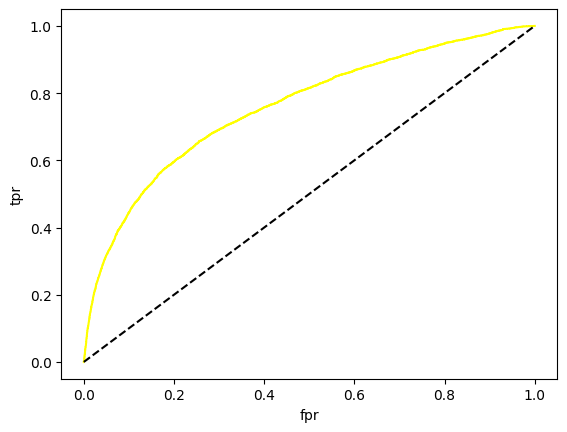

In [86]:
fpr,tpr,thresholds=roc_curve(y,classifier.predict_proba(x)[:,1])
auc=roc_auc_score(y,y_pred)
plt.plot(fpr,tpr,color='yellow')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [87]:
auc

0.5702770146539012